In [14]:
library(dplyr)
library(ggplot2)

In [5]:
# Carregando os dados
nba <- read.csv(
    '/content/NBAunido.csv',
    sep=','
)
head(nba)

,playerId,salary,rankingSalary,experience,year,playerSlug,college,draftinfo,name,birthdate,⋯,threePointFieldGoalsAttempted,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints
,<int>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,366,9000000,15,None,1999,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,199,356,474,223,167,2.291667,0.14583333,110,7,994
2,366,10125000,27,None,2000,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,261,442,620,328,230,2.057143,0.07142857,144,5,99999
3,366,11250000,17,None,2001,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,306,585,719,325,237,2.507042,0.28169015,178,20,0
4,366,12375000,14,None,2002,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,268,475,585,331,237,2.800000,0.21666667,168,13,0
5,366,13500000,11,None,2003,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,303,570,736,454,286,2.743902,0.15853658,225,13,0
6,366,14625000,8,None,2004,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,199,339,455,324,209,2.395833,0.10416666,115,5,0


In [6]:
# Verificando tipo de dados existentes no dataframe
str(nba)

'data.frame':	8162 obs. of  56 variables:
 $ playerId                        : int  366 366 366 366 366 366 366 366 366 366 ...
 $ salary                          : num  9000000 10125000 11250000 12375000 13500000 ...
 $ rankingSalary                   : int  15 27 17 14 11 8 4 7 7 6 ...
 $ experience                      : chr  "None" "None" "None" "None" ...
 $ year                            : int  1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 ...
 $ playerSlug                      : chr  "allen-iverson" "allen-iverson" "allen-iverson" "allen-iverson" ...
 $ college                         : chr  "Georgetown" "Georgetown" "Georgetown" "Georgetown" ...
 $ draftinfo                       : chr  "1996: Rd 1, Pk 1 (PHI)" "1996: Rd 1, Pk 1 (PHI)" "1996: Rd 1, Pk 1 (PHI)" "1996: Rd 1, Pk 1 (PHI)" ...
 $ name                            : chr  "Allen Iverson" "Allen Iverson" "Allen Iverson" "Allen Iverson" ...
 $ birthdate                       : chr  "1975-06-07" "1975-06-07" "1975-06-

In [7]:
# verificando as colunas existentes do dataframe
colnames(nba)

[1] "playerId"                         "salary"                          
 [3] "rankingSalary"                    "experience"                      
 [5] "year"                             "playerSlug"                      
 [7] "college"                          "draftinfo"                       
 [9] "name"                             "birthdate"                       
[11] "birthplace"                       "weight"                          
[13] "height"                           "positionId"                      
[15] "position"                         "teamId"                          
[17] "team"                             "status"                          
[19] "gamesPlayed"                      "avgMinutes"                      
[21] "avgFouls"                         "flagrantFouls"                   
[23] "technicalFouls"                   "ejections"                       
[25] "doubleDouble"                     "tripleDouble"                    
[27] "minutes"                          "rebounds"                        
[29] "fouls"                            "avgRebounds"                     
[31] "avgPoints"                        "avgFieldGoalsMade"               
[33] "avgFieldGoalsAttempted"           "fieldGoalPct"                    
[35] "avgThreePointFieldGoalsMade"      "avgThreePointFieldGoalsAttempted"
[37] "threePointFieldGoalPct"           "avgFreeThrowsMade"               
[39] "avgFreeThrowsAttempted"           "freeThrowPct"                    
[41] "avgAssists"                       "avgTurnovers"                    
[43] "points"                           "fieldGoalsMade"                  
[45] "fieldGoalsAttempted"              "threePointFieldGoalsMade"        
[47] "threePointFieldGoalsAttempted"    "freeThrowsMade"                  
[49] "freeThrowsAttempted"              "assists"                         
[51] "turnovers"                        "avgSteals"                       
[53] "avgBlocks"                        "steals"                          
[55] "blocks"                           "totalPoints"

## Relação estatística por salário e posição dos jogadores

In [28]:
salario_posicao <- nba %>%

  group_by(position) %>%
  summarise(
    Quantidade = n(),
    media_salario = mean(salary, na.rm = TRUE),
    menor_salario = min(salary, na.rm = TRUE),
    maior_salario = max(salary, na.rm = TRUE),
    desvp_salario = sd(salary, na.rm = TRUE),
  ) %>%
  arrange(desc(media_salario))

print(salario_posicao)

# A tibble: 9 × 6
  position    Quantidade media_salario menor_salario maior_salario desvp_salario
  <chr>            <int>         <dbl>         <dbl>         <dbl>         <dbl>
1 ""                   6      9378051.       7394663      11530592      1522413.
2 "Point Gua…       1214      6893137.         37620      51915615      8428855.
3 "Power For…       1422      6665764.          4533      47649433      7282483.
4 "Center"          1530      6456620.         10552      46900000      6844659.
5 "Small For…       1191      6219563.         22287      46900000      7544361.
6 "Shooting …       1261      6179160.          5767      46741590      7044936.
7 "Forward"          751      4985835.          8558      45640084      5540788.
8 "Guard"            786      4478696.         12260      23200000      4447977.
9 "Guard-For…          1      2177114        2177114       2177114           NA 


## Relação entre salário e estatísticas de jogo

In [24]:
# Selecionando as colunas para análise e calculando correlação
numeric_columns <- c("salary", "avgPoints", "avgRebounds", "avgAssists")

matriz_corr <- cor(nba[numeric_columns], use = "complete.obs")
print(matriz_corr)


               salary avgPoints avgRebounds avgAssists
salary      1.0000000 0.6632779   0.4703151  0.4742300
avgPoints   0.6632779 1.0000000   0.5601075  0.6545797
avgRebounds 0.4703151 0.5601075   1.0000000  0.1857163
avgAssists  0.4742300 0.6545797   0.1857163  1.0000000


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


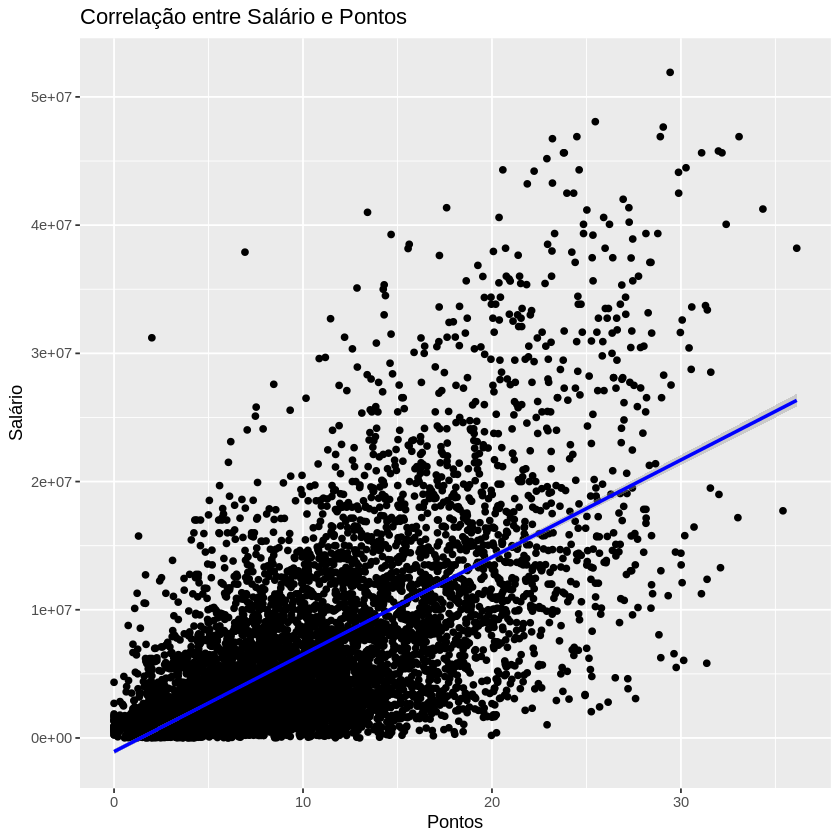

`geom_smooth()` using formula = 'y ~ x'


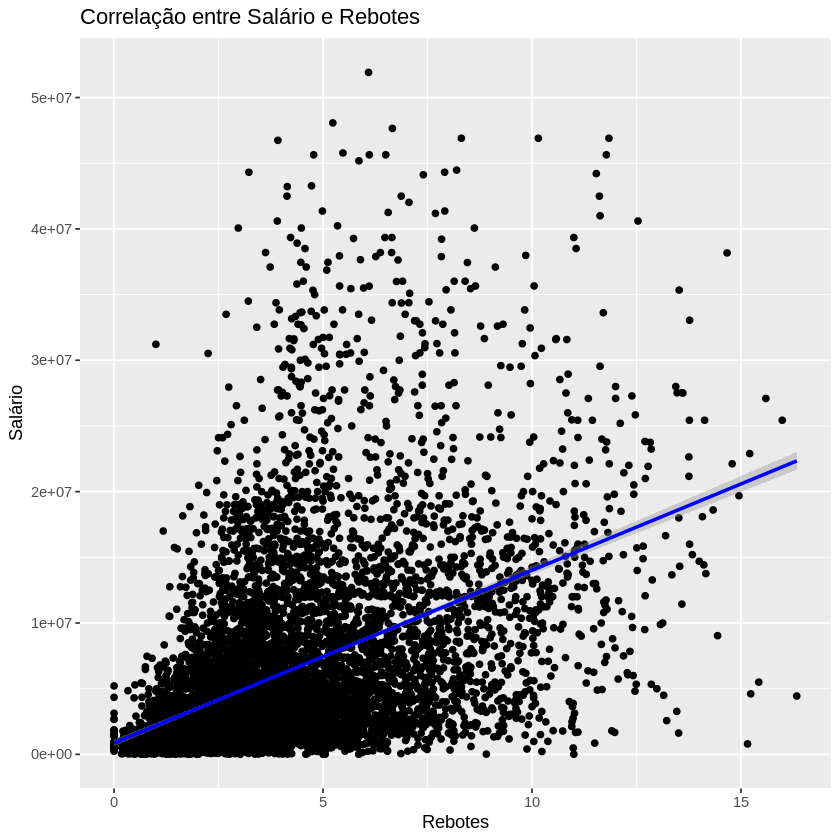

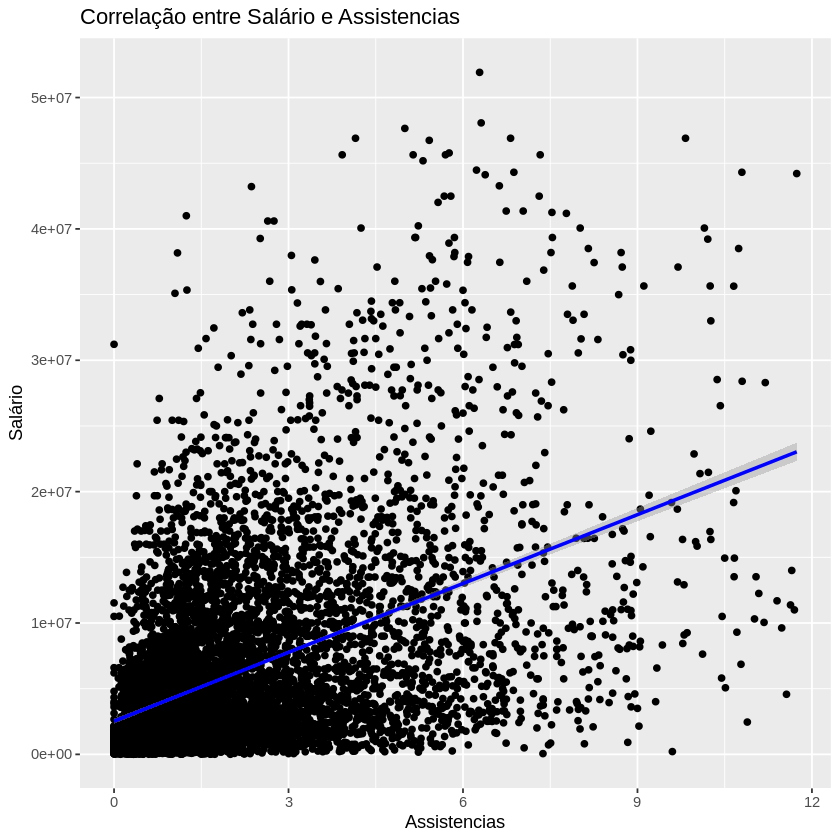

In [25]:
# Criando gráfico de dispersão de salário vs média de pontos
ggplot(nba, aes(x = avgPoints, y = salary)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Correlação entre Salário e Pontos", x = "Pontos", y = "Salário")

# Criando gráfico de dispersão de salário vs média de rebotes
ggplot(nba, aes(x = avgRebounds, y = salary)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Correlação entre Salário e Rebotes", x = "Rebotes", y = "Salário")

# Criando gráfico de salário vs média de assistências
ggplot(nba, aes(x = avgAssists, y = salary)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Correlação entre Salário e Assistencias", x = "Assistencias", y = "Salário")

## Relação entre idade e salário de jogadores ativos



In [26]:
# Criando coluna nova chamada 'age' para lotar registros de idade em números inteiros de cada jogador
nba$age <- as.numeric(difftime(Sys.Date(), nba$birthdate, units = "weeks")) / 52.25
nba$age <- nba$age <- as.integer(nba$age)
head(nba)

,playerId,salary,rankingSalary,experience,year,playerSlug,college,draftinfo,name,birthdate,⋯,freeThrowsMade,freeThrowsAttempted,assists,turnovers,avgSteals,avgBlocks,steals,blocks,totalPoints,age
,<int>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,366,9000000,15,None,1999,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,356,474,223,167,2.291667,0.14583333,110,7,994,49
2,366,10125000,27,None,2000,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,442,620,328,230,2.057143,0.07142857,144,5,99999,49
3,366,11250000,17,None,2001,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,585,719,325,237,2.507042,0.28169015,178,20,0,49
4,366,12375000,14,None,2002,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,475,585,331,237,2.800000,0.21666667,168,13,0,49
5,366,13500000,11,None,2003,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,570,736,454,286,2.743902,0.15853658,225,13,0,49
6,366,14625000,8,None,2004,allen-iverson,Georgetown,"1996: Rd 1, Pk 1 (PHI)",Allen Iverson,1975-06-07,⋯,339,455,324,209,2.395833,0.10416666,115,5,0,49


In [33]:
# Filtrando os jogadores ativos
nba_ativos <- nba %>%
  filter(status == "active")

# Calculando as estatísticas descritivas para jogadores ativos
age_summary_ativos <- summary(nba_ativos$age)
salary_summary_ativos <- summary(nba_ativos$salary)

# Exibindo os resultados
print("Estatísticas Descritivas para Idade (Jogadores Ativos):")
print(age_summary_ativos)
print("Estatísticas Descritivas para Salário (Jogadores Ativos):")
print(salary_summary_ativos)


[1] "Estatísticas Descritivas para Idade (Jogadores Ativos):"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   27.00   31.00   30.86   34.00   44.00 
[1] "Estatísticas Descritivas para Salário (Jogadores Ativos):"
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    8558  2176832  5478376  9699089 14118361 51915615 


NULL

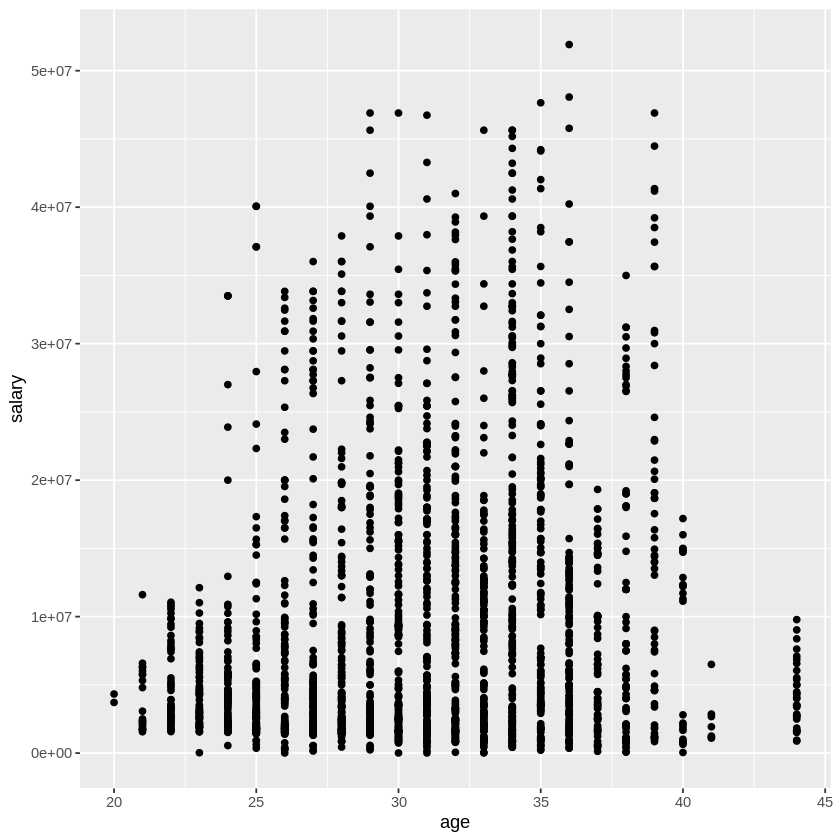

In [34]:
# Gráfico de dispersão de idade vs salário
ggplot(nba_ativos, aes(x = age, y = salary)) +
  geom_point()
  labs(title = "Correlação entre Idade e Salário", x = "Idade (anos)", y = "Salário") +
  theme_bw()
